In [8]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации
 
from sklearn import metrics #метрики
from sklearn import model_selection #методы разделения и валидации
from sklearn import linear_model #линейные модели
from sklearn import tree #деревья решений
plt.style.use('seaborn-v0_8') #стиль отрисовки seaborn
%matplotlib inline

import warnings
warnings.simplefilter('ignore')
from sklearn.neighbors import KNeighborsClassifier

Алгоритм работы k-nearest neighbour (KNN)

Зададим k — количество ближайший соседей, по которым принимается решение.
Выберем расстояние, по которому будут определяться соседи. Обычно это евклидово расстояние, рассмотренное ранее.
Обучим модель на признаковом пространстве.
Как было сказано ранее, обучение алгоритма kNN заключается в получении пар признаковое пространство-целевая метка. Далее данные нормализуются с использованием MinMaxScaler(). Напомним его формулу:

X=X−min[X]max[X]−min[X]

Получим предсказание модели.

Предсказание заключается в поиске k ближайших соседей на основе метрики, выбранной ранее. Данная модель в sklearn реализована в модуле sklearn.neighbors как KNeighborsClassifier для задачи классификации и KNeighborsRegressor для задачи регресии.

Давайте подробнее разберём все параметры модели:

n_neighbors — количество  соседей, по умолчанию 5.
weights{'uniform', 'distance'} — вес объекта в зависимости от удаленности от объекта. Как говорилось ранее, если uniform, то расстояние не будет учитываться в подсчёте вероятности для классификации. По умолчанию оно не учитывается, параметр имеет значение 'uniform'. При 'distance' расстояние учитывается.
algorithm — алгоритм, используемый при подсчёте расстояния.
'ball_tree' использует BallTree.
'kd_tree' использует  KDTree.
'brute' использует жадный алгоритм.
'auto' выбирает оптимальный из вышепредставленных.
leaf_size — параметр для поиска расстояния BallTree или KDTree. По умолчанию равен 30.
p — значение p-метрики Миньковского. Как мы знаем, p=1 — расстояние Манхэттена (L1), p=2 — Евклидово расстояние (L2). По умолчанию p=2.
metric — метрика для оценки расстояний, по умолчанию расстояние Миньковского.
n_jobs — количество задач, выполняемых параллельно, ограничено количеством ядер вычислительной машины. При n_jobs=-1 использует все.
Приведём пример: 

Сформируем искусственные данные: 

In [9]:
data = pd.DataFrame([[0,0,0],[0.2,0.1,0], [1,0,0], [2,1,1],[2.5,0.9,1], [3,1,1]], columns = ['x','y', 'target'])


Отделим матрицу признаков и вектор-столбец правильных ответов: 

In [10]:
X = data.drop(['target'],axis = 1)
Y = data['target']

Обучим kNN с тремя соседями:

In [11]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, Y)

KNeighborsClassifier(n_neighbors=3)

Посмотрим на визуализацию исходных данных и работы модели по классификации точки. Вероятность принадлежности к классу можно вычислить методом predict_proba(), а само предсказание — методом predict:

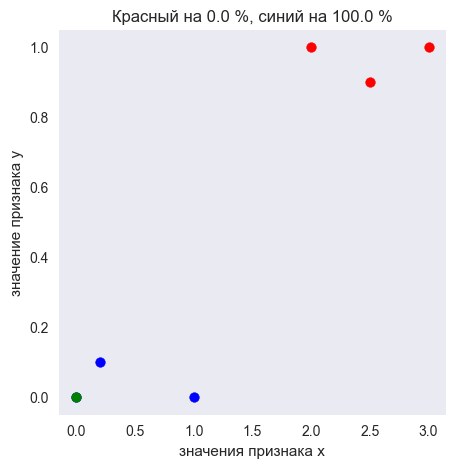

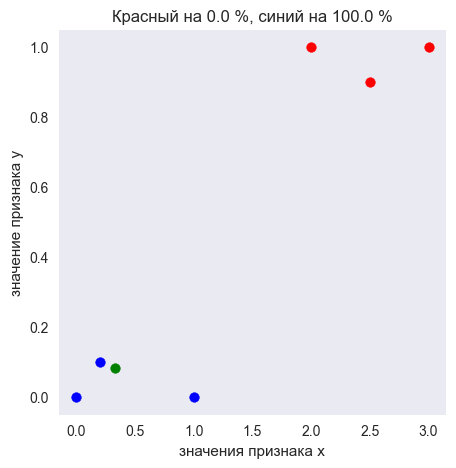

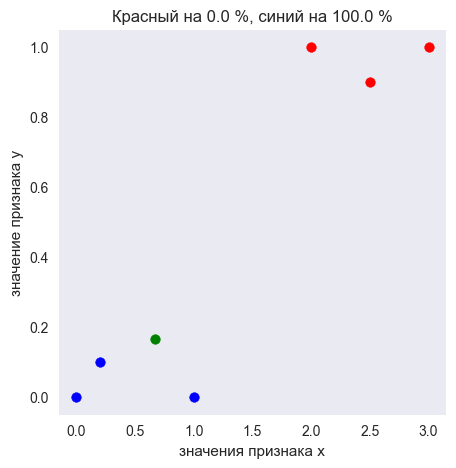

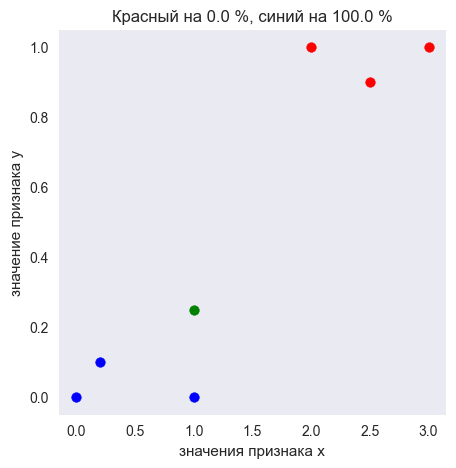

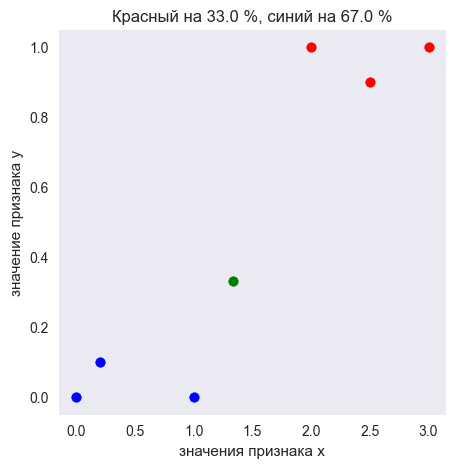

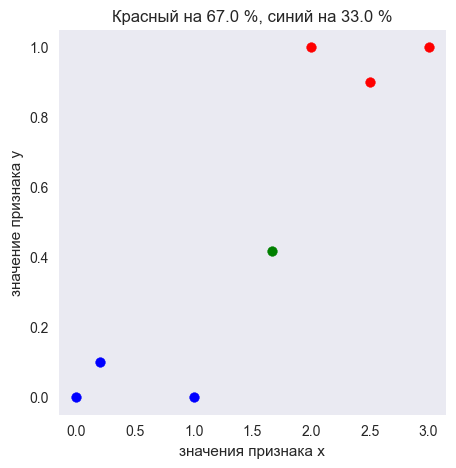

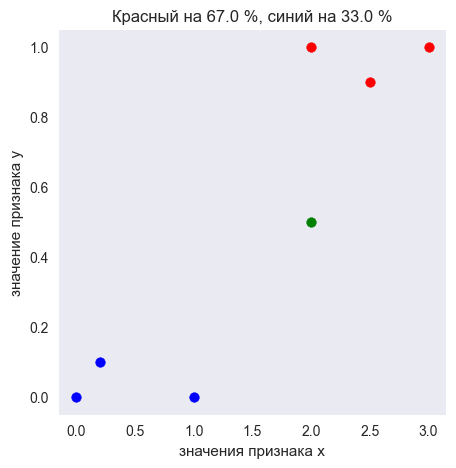

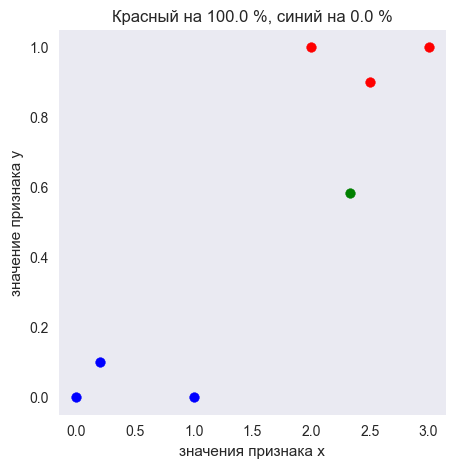

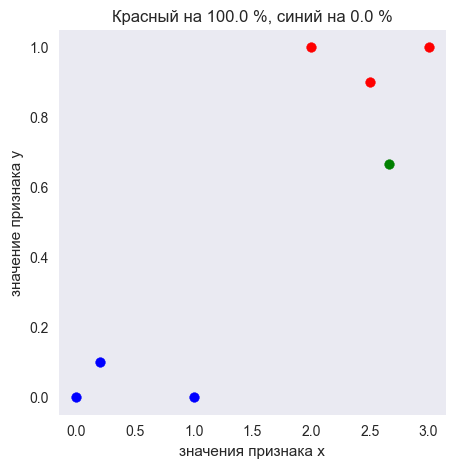

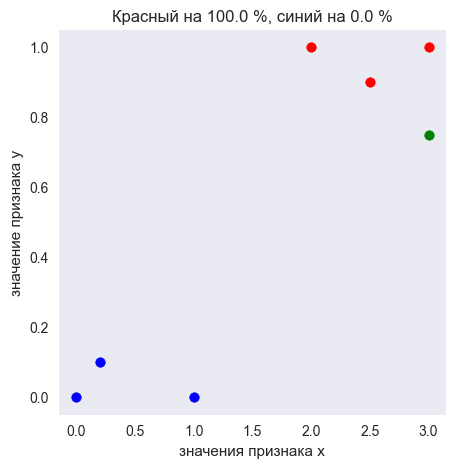

In [12]:
for item in np.linspace(0,3,10):
    x = item
    y = item*0.25
    plt.figure(figsize = (5,5))
    red = data[data.target == 1]
    blue = data[data.target == 0]
    red_prob = round(neigh.predict_proba([[x,y]])[0][1],2)*100 #вероятность принадлежности к красным
    blue_prob = round(neigh.predict_proba([[x,y]])[0][0],2)*100 #вероятность принадлежности к синим
    plt.title(f'Красный на {red_prob} %, синий на {blue_prob} %')
    plt.xlabel('значения признака x')
    plt.ylabel('значение признака y')
    plt.scatter(red.x.values,red.y.values ,c= 'r')
    plt.scatter(blue.x.values,blue.y.values ,c= 'b')
    plt.scatter(x,y ,c= 'g')
    plt.grid()
    plt.show()

Как можно видеть, когда зеленая точка «улетает» из кластера синих точек, вероятность падает, при этом вероятность принадлежности к классу в данном случае может принимать всего четыре значения (0, 0.33, 0.66, 1) в зависимости от количества соседей, так как не учтено расстояние при подсчёте вероятности. 

Попробуем учесть расстояние. Для этого в модель подадим параметр weights='distance'.
В коде выше изменим объект модели:

In [13]:
neigh = KNeighborsClassifier(n_neighbors=3, weights='distance')
neigh.fit(X, Y)

KNeighborsClassifier(n_neighbors=3, weights='distance')

И выполним код заново. Анимированный результат работы модели: 



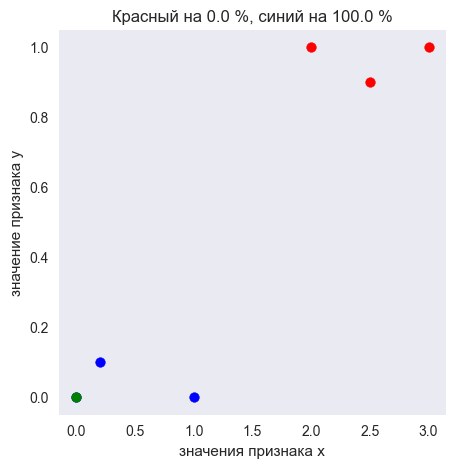

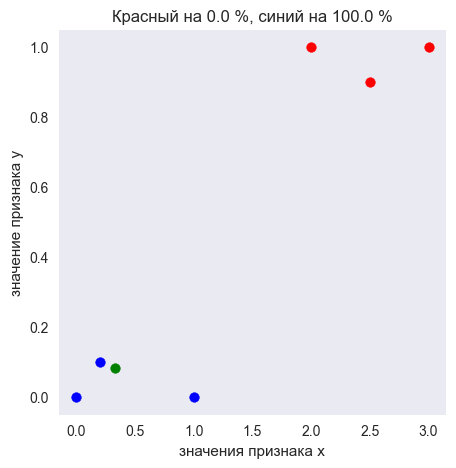

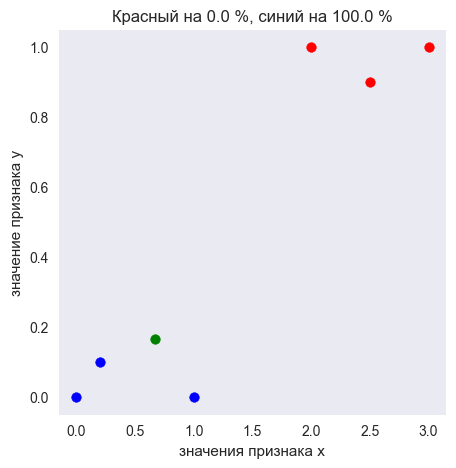

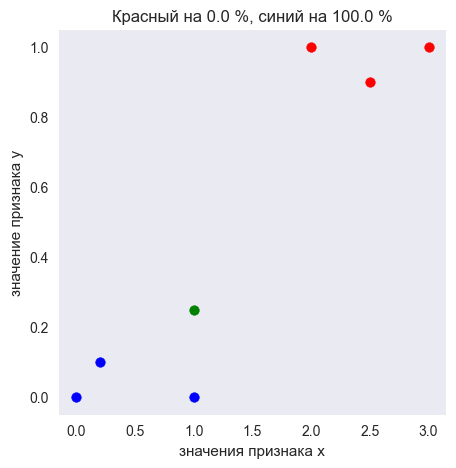

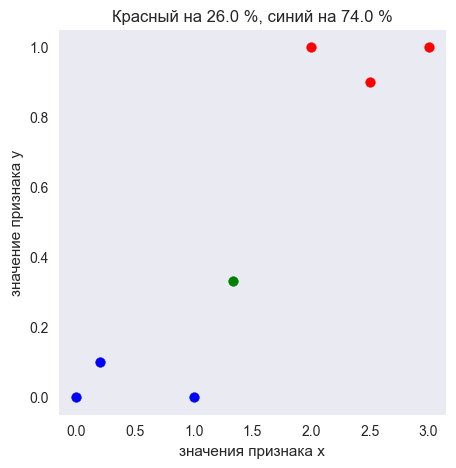

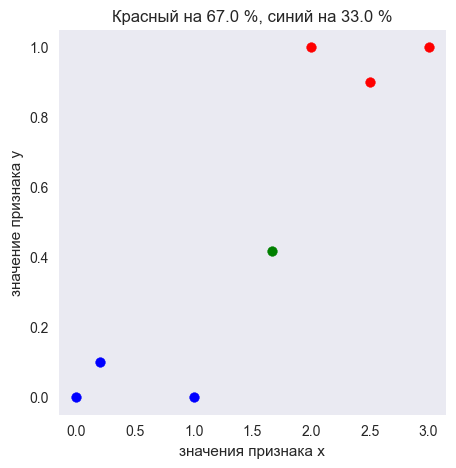

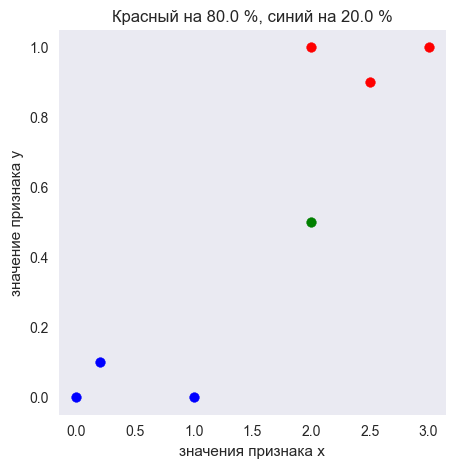

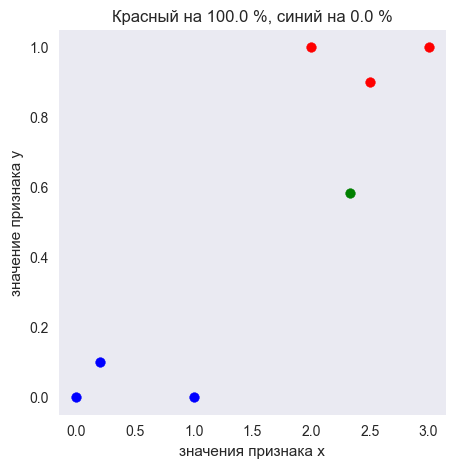

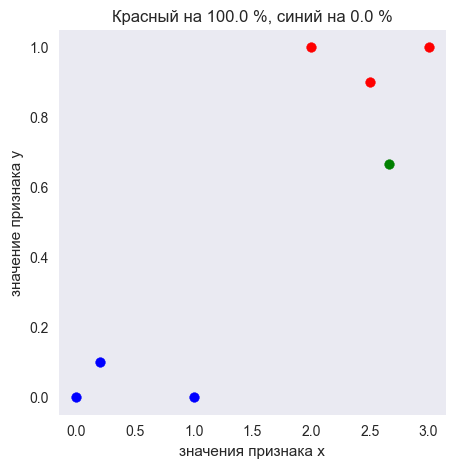

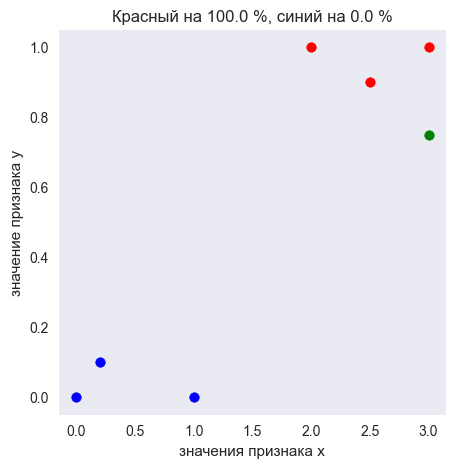

In [14]:
for item in np.linspace(0,3,10):
    x = item
    y = item*0.25
    plt.figure(figsize = (5,5))
    red = data[data.target == 1]
    blue = data[data.target == 0]
    red_prob = round(neigh.predict_proba([[x,y]])[0][1],2)*100 #вероятность принадлежности к красным
    blue_prob = round(neigh.predict_proba([[x,y]])[0][0],2)*100 #вероятность принадлежности к синим
    plt.title(f'Красный на {red_prob} %, синий на {blue_prob} %')
    plt.xlabel('значения признака x')
    plt.ylabel('значение признака y')
    plt.scatter(red.x.values,red.y.values ,c= 'r')
    plt.scatter(blue.x.values,blue.y.values ,c= 'b')
    plt.scatter(x,y ,c= 'g')
    plt.grid()
    plt.show()

Как видим, теперь вероятности могут принимать абсолютно любые значения и точнее предсказывать вероятность принадлежности к классу.

Примечание. В случае задачи регрессии целевая метка нашего объекта определяется как среднее значение целевой метки по k ближайшим соседям.

Расчёты ведутся точно так же, только вместо вероятности предсказания класса высчитывается среднее по ближайшим соседям. Также при использовании взвешенного подхода, среднее уже будет взвешенным в зависимости от расстояния до соседа: чем ближе к точке, тем больший вклад соседа.

Предположим, целевая метка у трёх ближайших соседей в нашем случае равна 0.2, 0.3 и 0.8 соответственно, целевая метка без учёта расстояния равна (0.2+0.3+0.8)/3 = 0.43. 

### Задание 7.1

1 point possible (graded)

Какова вероятность принадлежности к нулевому классу объекта для модели 5 ближайших соседей без учёта расстояний до соседей, если в соседях — 4 представителя нулевого класса и 1 — единичного?

0.8

Для KNeighborsClassifier с параметром weights='uniform' (без учёта расстояний до соседей) вероятность рассчитывается как отношение количества соседей данного класса к общему количеству соседей.
Давайте посчитаем:
Всего соседей: 5 (n_neighbors=5)
Соседей нулевого класса: 4
Соседей единичного класса: 1
Вероятность принадлежности к нулевому классу:

$$P(class=0) = \frac{4}{5} = 0.8$$

### Задание 7.2

1/1 point (graded)

Какова вероятность принадлежности к нулевому класса объекта для модели 5 ближайших соседей c учётом расстояний до соседей, если в соседях — 3 представителя нулевого класса и 2 — единичного?


- 0.6
- 0.4
- нельзя дать точный ответ

Ответ
+ нельзя дать точный ответ - ВЕРНО



Верно:Как мы убедились ранее, с учётом расстояния до соседей вероятность напрямую зависит от расстояния до объектов классов. Без информации о взаимном расположении точек в  n -мерном пространстве мы даже не можем сказать, какой это будет класс (единичный или нулевой).